In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/csv_rais_anonymized/hourly_fitbit_sema_df_unprocessed.csv
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/scored_surveys/personality.csv
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/scored_surveys/breq.csv
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/scored_surveys/stai.csv
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/scored_surveys/panas.csv
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/scored_surveys/ttm.csv
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/mongo_rais_anonymized/surveys.bson
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/mongo_rais_anonymized/sema.metadata.json
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/mongo_rais_anonymized/surveys.metadata.json
/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/mongo_rais_anonymized/sema.bson
/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler


In [3]:
df_daily=pd.read_csv("/kaggle/input/lifesnaps-fitbit-dataset/rais_anonymized/csv_rais_anonymized/hourly_fitbit_sema_df_unprocessed.csv",  parse_dates=['date']  )

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,10,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_daily.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df_daily.head()

,id,date,hour,temperature,badgeType,calories,distance,activityType,bpm,mindfulness_session,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,621e2e8e67b776a24055b564,2021-05-24,0.0,-1.466659,NaN,89.04,98.3,NaN,66.874763,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,621e2e8e67b776a24055b564,2021-05-24,1.0,0.210289,NaN,65.62,0.0,NaN,58.711364,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,621e2e8e67b776a24055b564,2021-05-24,2.0,-1.359378,NaN,65.40,NaN,NaN,55.133495,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e2e8e67b776a24055b564,2021-05-24,3.0,-0.316295,NaN,69.01,11.0,NaN,60.488613,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2e8e67b776a24055b564,2021-05-24,4.0,0.416455,NaN,65.73,0.0,NaN,59.110638,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_daily.drop("id",axis=1,inplace=True) 

In [7]:
print(f"rows are: {df_daily.shape[0]}, columns are :  {df_daily.shape[1]} in daily dataset"  )  
# print(f"rows are: {df_our.shape[0]}, columns are :  {df_our.shape[1]}  in hour dataset"  )  

rows are: 159508, columns are :  37 in daily dataset


In [8]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159508 entries, 0 to 159507
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          159508 non-null  datetime64[ns]
 1   hour                          159508 non-null  float64       
 2   temperature                   74777 non-null   float64       
 3   badgeType                     521 non-null     object        
 4   calories                      159048 non-null  float64       
 5   distance                      93133 non-null   float64       
 6   activityType                  3912 non-null    object        
 7   bpm                           96119 non-null   float64       
 8   mindfulness_session           159112 non-null  object        
 9   scl_avg                       437 non-null     float64       
 10  steps                         93133 non-null   float64       
 11  minutes_in_de

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
def null_values(df):
    null_values=pd.DataFrame({  "Null Values":df.isnull().sum()} )
    null_values=null_values.reset_index()
    print(null_values)



def draw_boxplot(df,numeric_columns,a=None):
    plt.figure(figsize=(28,100))
    plotnumber=1
    for i in numeric_columns.columns:
        ax=plt.subplot(30,4,plotnumber)
        sns.boxplot(x=numeric_columns[i],hue=a) 
        plt.xlabel(i )
    #     plt.xticks(rotation=70, size = 15)
        plotnumber+=1
    plt.show()     
def draw_dist(df,numeric_columns):   
    plt.figure(figsize=(28,80))
    plotnumber=1
    for i in numeric_columns.columns:
        ax=plt.subplot(15,4,plotnumber)
        sns.distplot(x=df[i], color = 'g',    kde_kws={"color": "r", "lw": 3, "label": "KDE"}) 
        plt.xlabel(i, size = 20) 
        plotnumber+=1
    plt.show()
    
def draw_hist(df,numeric_columns):
    plt.figure(figsize=(28,100))
    plotnumber=1
    for i in numeric_columns.columns:
        ax=plt.subplot(15,4,plotnumber)
        df[i].hist() 

        plt.title(i,size=20)
        plotnumber+=1
    plt.show() 
      
    

In [10]:
null_values(df_daily)

                           index  Null Values
0                           date            0
1                           hour            0
2                    temperature        84731
3                      badgeType       158987
4                       calories          460
5                       distance        66375
6                   activityType       155596
7                            bpm        63389
8            mindfulness_session          396
9                        scl_avg       159071
10                         steps        66375
11     minutes_in_default_zone_1       154632
12  minutes_below_default_zone_1       154632
13     minutes_in_default_zone_2       154632
14     minutes_in_default_zone_3       154632
15                           age        13412
16                        gender         7579
17                           bmi        13412
18                     step_goal       157589
19                      min_goal       157589
20                      max_goal  

In [11]:
df_daily.isnull().sum( )*100/df_daily.shape[0]

date                             0.000000
hour                             0.000000
temperature                     53.120220
badgeType                       99.673371
calories                         0.288387
distance                        41.612333
activityType                    97.547458
bpm                             39.740327
mindfulness_session              0.248263
scl_avg                         99.726033
steps                           41.612333
minutes_in_default_zone_1       96.943100
minutes_below_default_zone_1    96.943100
minutes_in_default_zone_2       96.943100
minutes_in_default_zone_3       96.943100
age                              8.408356
gender                           4.751486
bmi                              8.408356
step_goal                       98.796926
min_goal                        98.796926
max_goal                        98.796926
step_goal_label                 98.795672
ALERT                           96.847180
HAPPY                           96

In [12]:
df_daily.describe()

,hour,temperature,calories,distance,bpm,scl_avg,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
count,159508.000000,74777.000000,159048.000000,93133.000000,96119.000000,437.000000,93133.000000,4876.000000,4876.000000,4876.000000,...,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000
mean,11.459776,-1.561263,91.473696,299.663884,78.374680,9.602859,423.977076,165.675349,964.439295,8.585521,...,0.123285,0.223901,0.041559,0.003579,0.588387,0.061444,0.011931,0.075761,0.044542,0.172599
std,6.932618,2.030328,54.032822,549.892183,15.057796,6.440754,752.760210,148.032047,382.849924,20.680720,...,0.328797,0.416898,0.199599,0.059726,0.492175,0.240166,0.108585,0.264641,0.206316,0.377938
min,0.000000,-10.012848,0.690000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,-2.813150,63.000000,4.600000,67.825290,3.257049,7.000000,59.000000,730.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,-1.055772,75.430000,81.500000,78.500000,9.438884,116.000000,125.000000,1090.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,-0.041731,97.220000,342.900000,87.422451,15.365566,495.000000,229.000000,1270.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,4.972184,1139.030000,10460.300000,192.773869,33.467584,9350.000000,1023.000000,1440.000000,313.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
##

## Numeric & cateorical columns

In [14]:
cate_columns_daily=df_daily.select_dtypes(include=['category','object'])
numeric_columns_daily=df_daily.select_dtypes(include=['int','float']) 

## Univariate

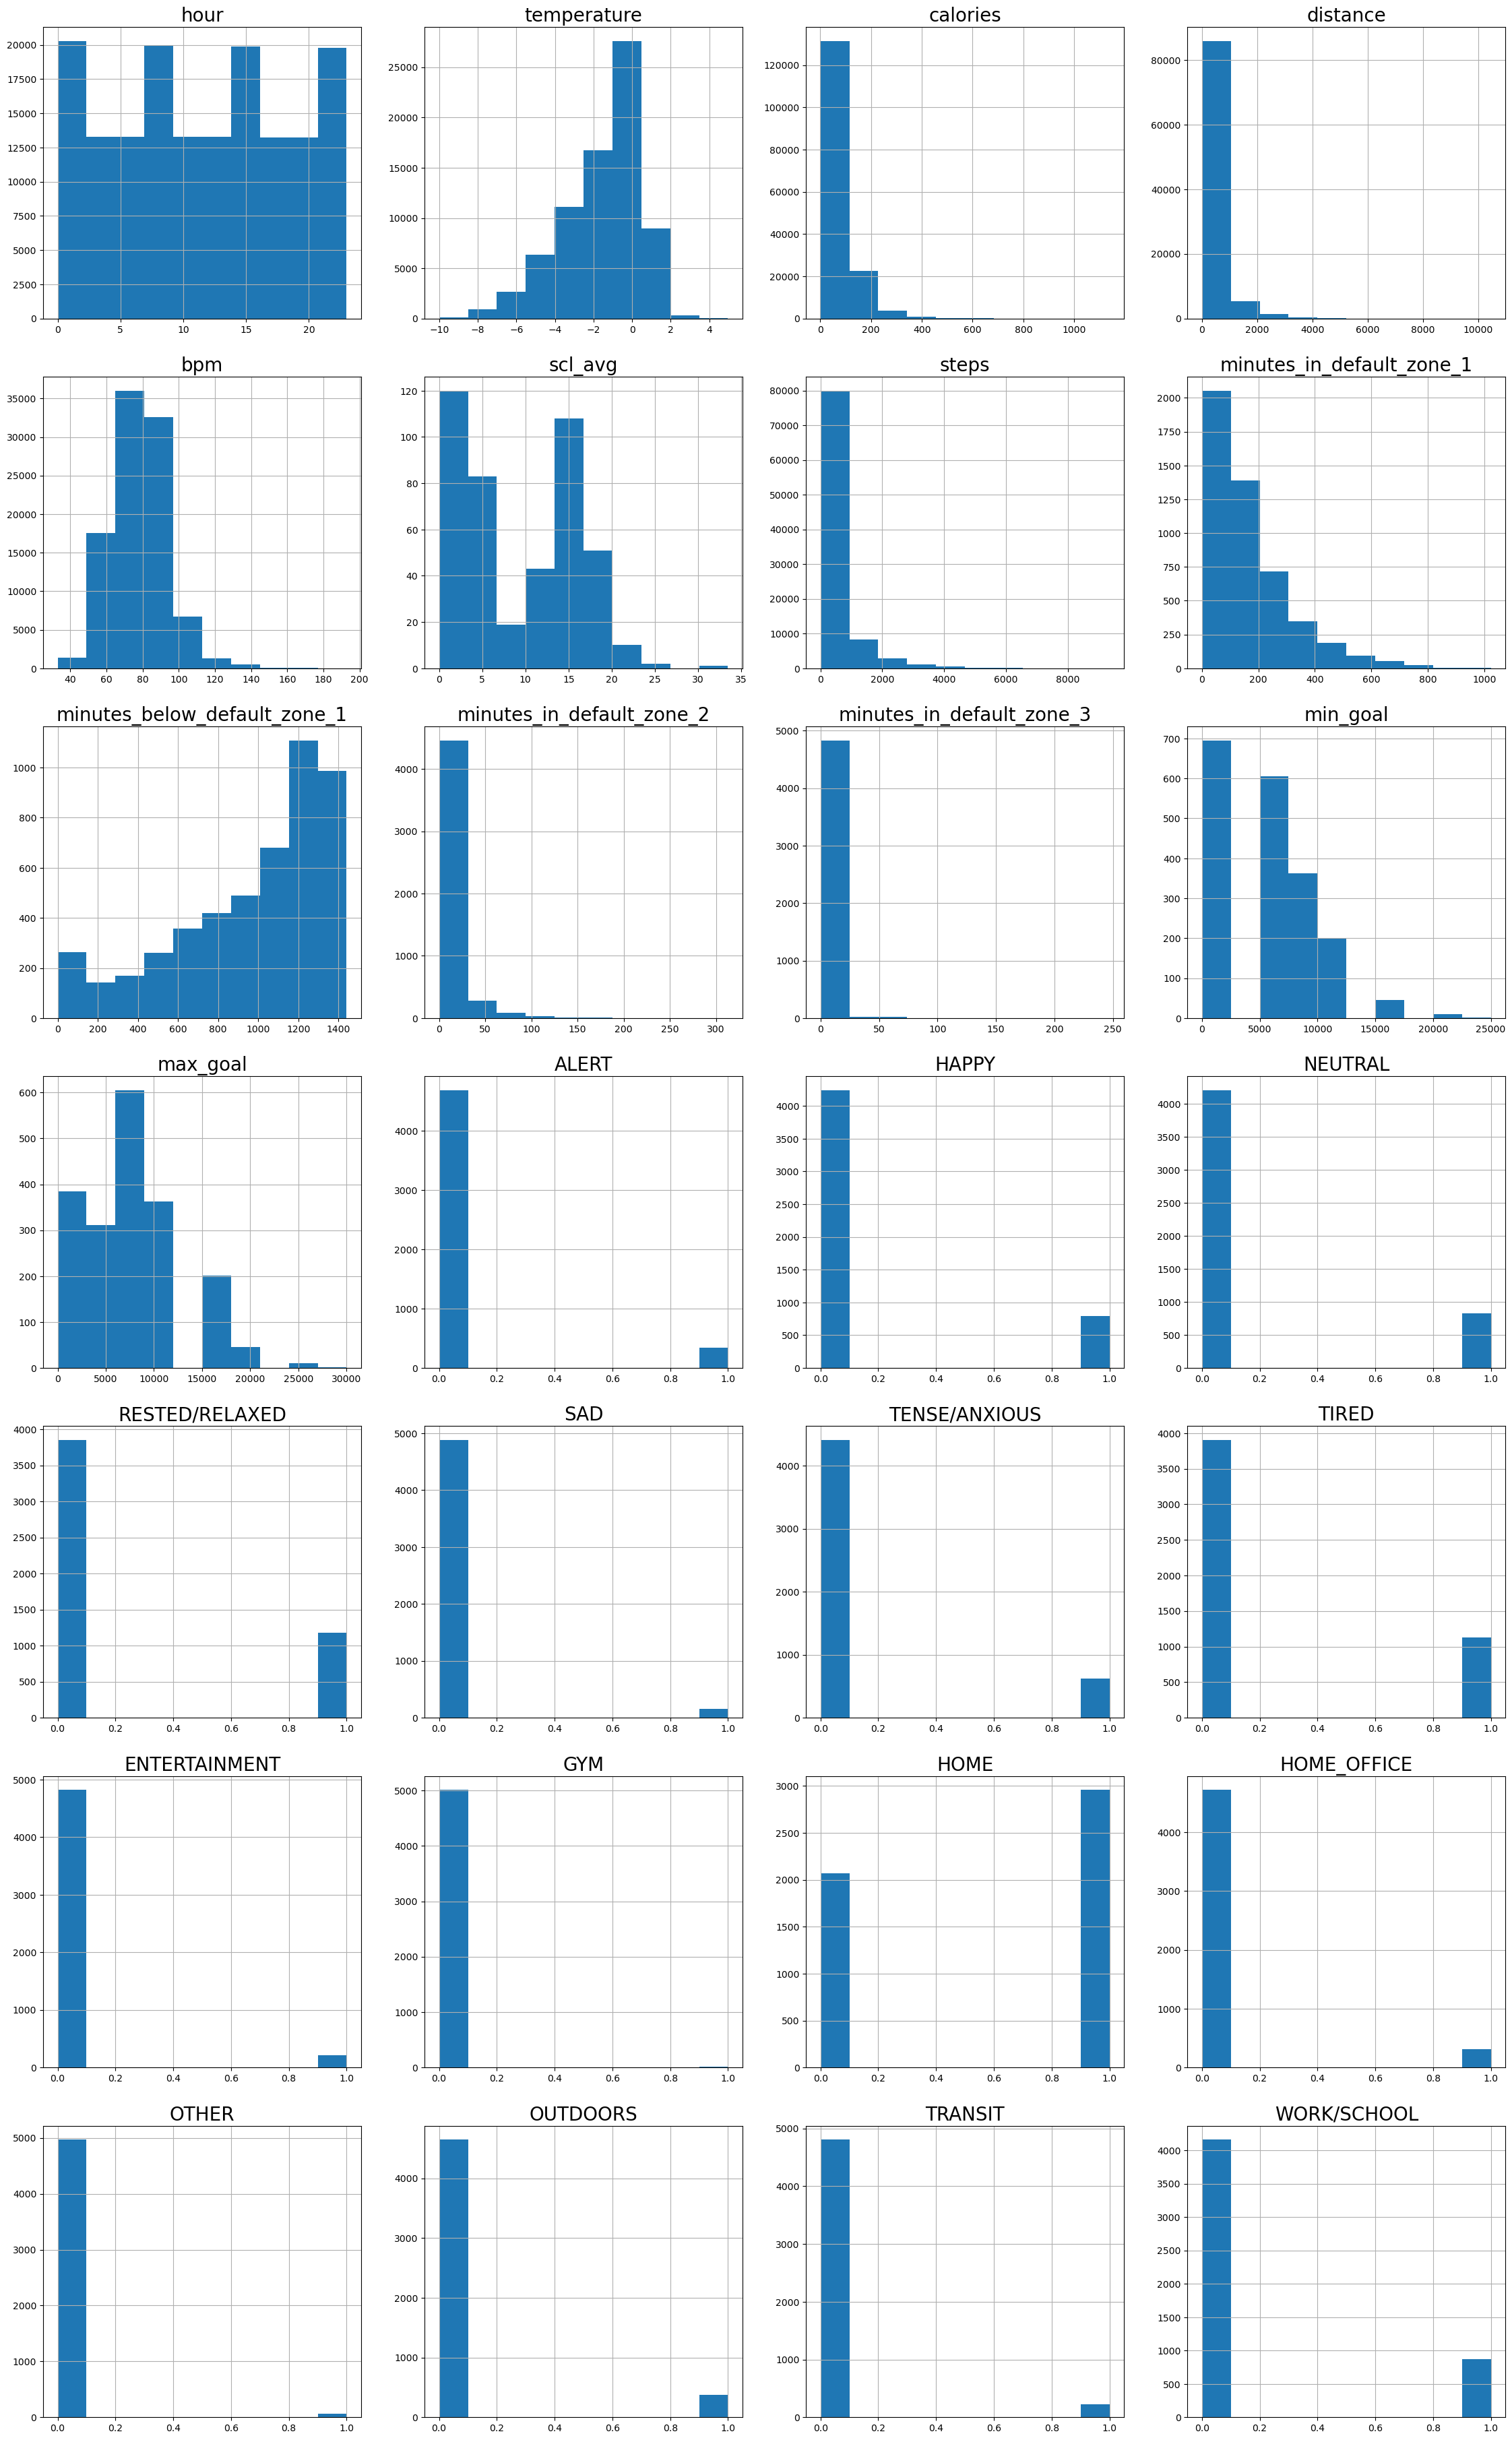

In [15]:
draw_hist(df_daily ,numeric_columns_daily)

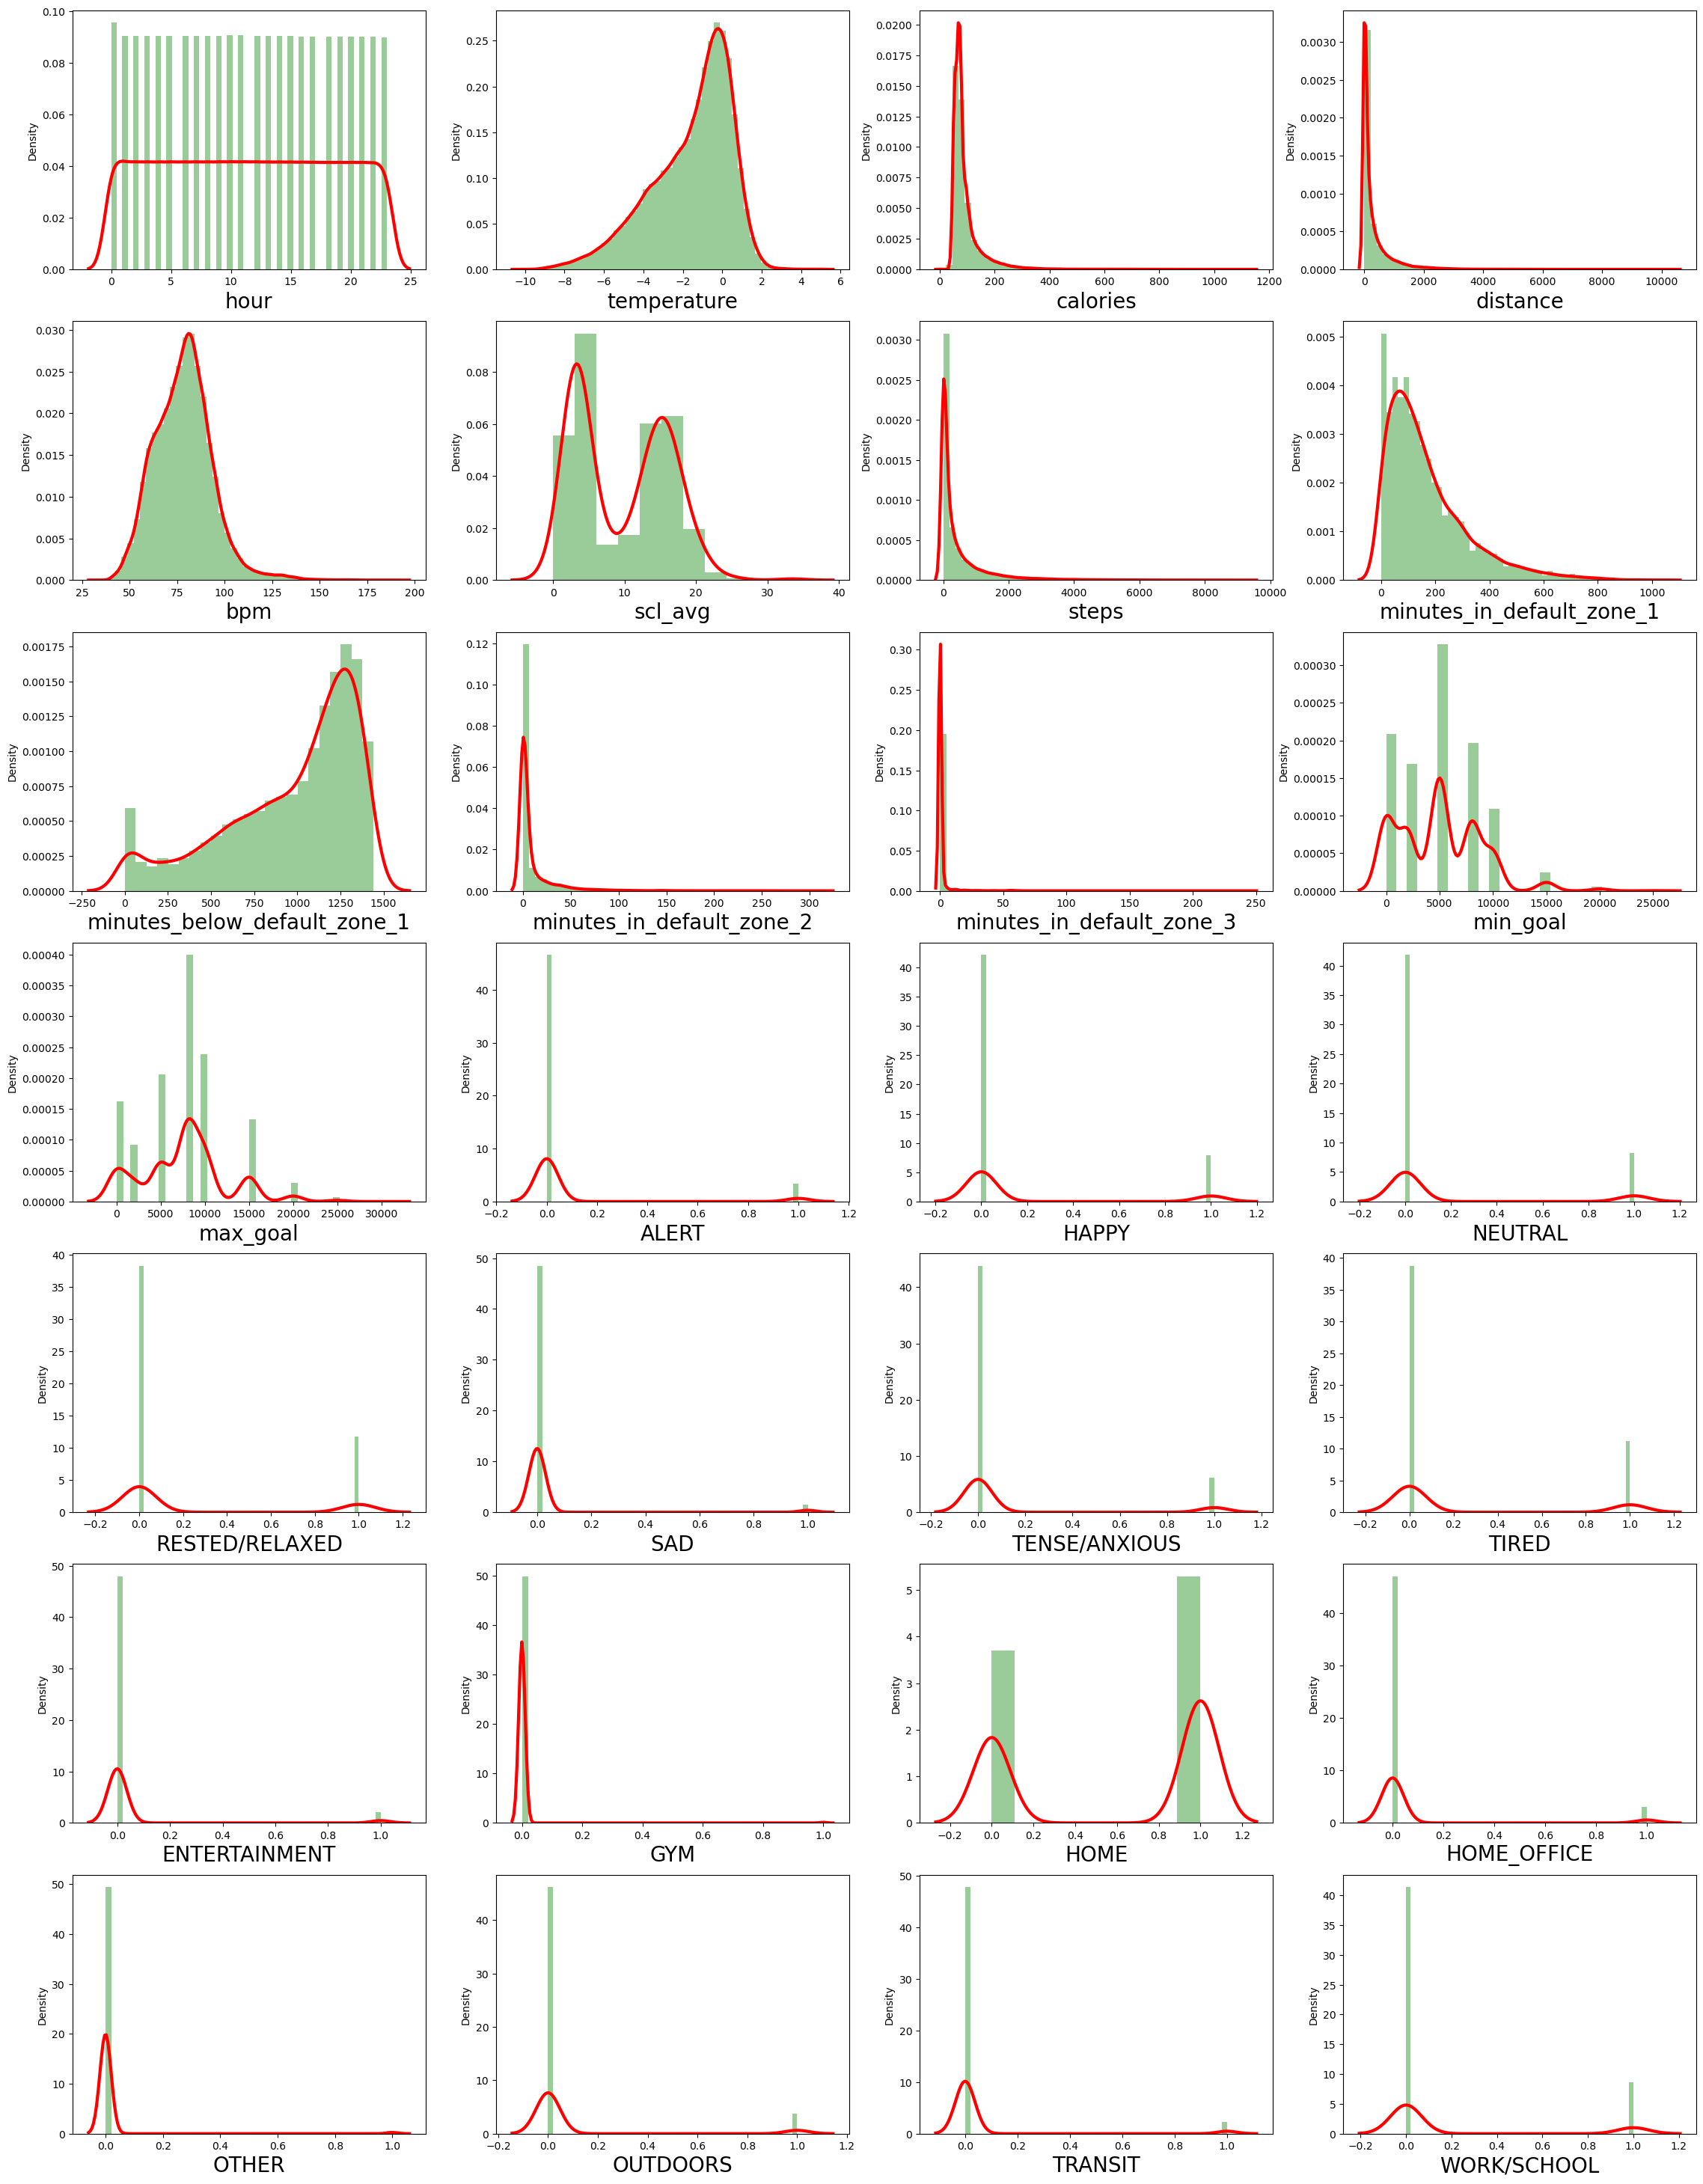

In [16]:
draw_dist(df_daily,numeric_columns_daily)

## Bivariate

<AxesSubplot:xlabel='age', ylabel='count'>

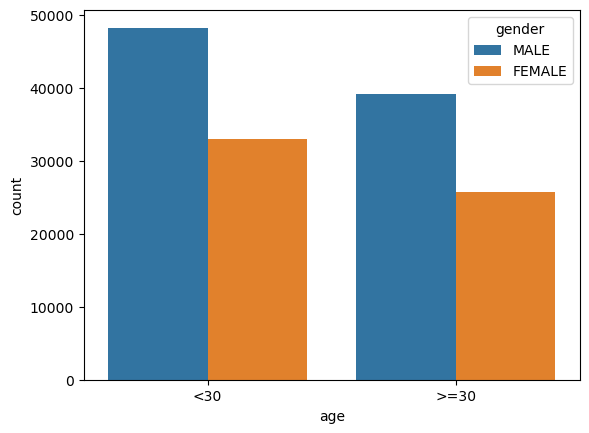

In [17]:
sns.countplot(x=df_daily["age"],hue=df_daily["gender"])

<AxesSubplot:xlabel='age', ylabel='count'>

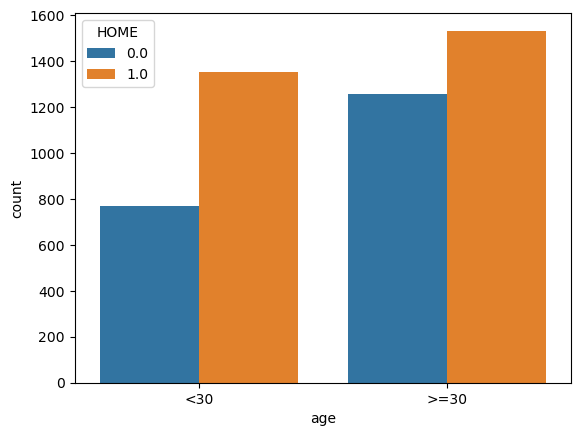

In [18]:
sns.countplot(x=df_daily["age"],hue=df_daily["HOME"])

<AxesSubplot:xlabel='gender', ylabel='count'>

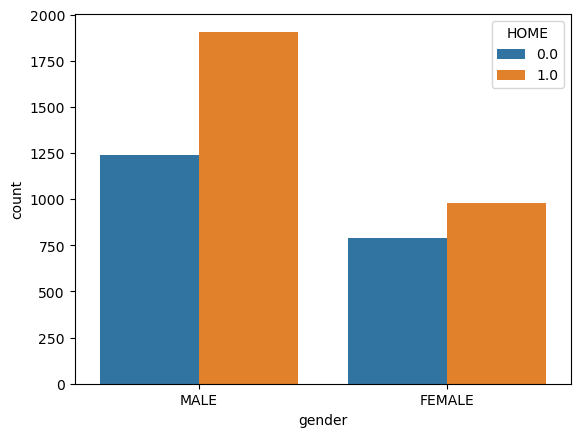

In [19]:
sns.countplot(x=df_daily["gender"],hue=df_daily["HOME"])

<AxesSubplot:xlabel='gender', ylabel='count'>

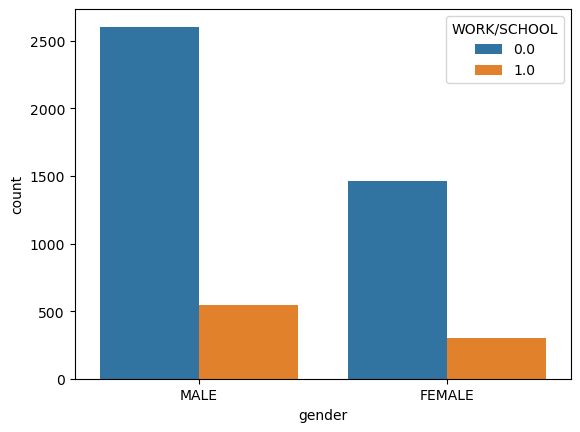

In [20]:
sns.countplot(x=df_daily["gender"],hue=df_daily["WORK/SCHOOL"]) 

<AxesSubplot:xlabel='gender', ylabel='count'>

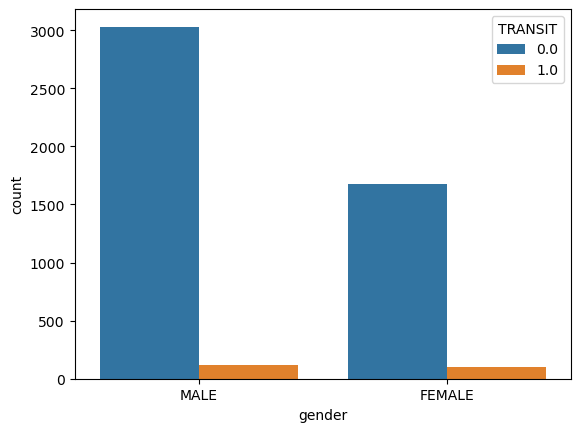

In [21]:
sns.countplot(x=df_daily["gender"],hue=df_daily["TRANSIT"]) 

<AxesSubplot:xlabel='gender', ylabel='count'>

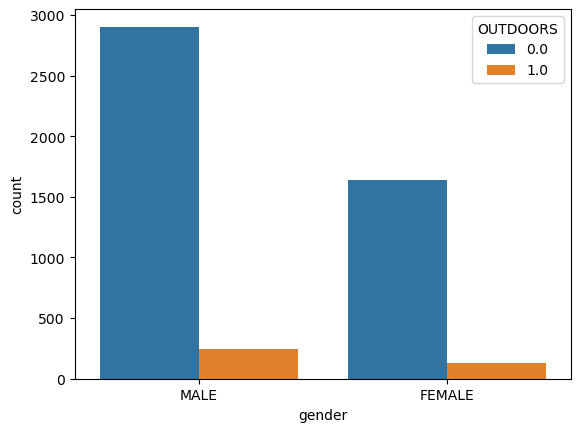

In [22]:
sns.countplot(x=df_daily["gender"],hue=df_daily["OUTDOORS"]) 

<AxesSubplot:xlabel='age', ylabel='count'>

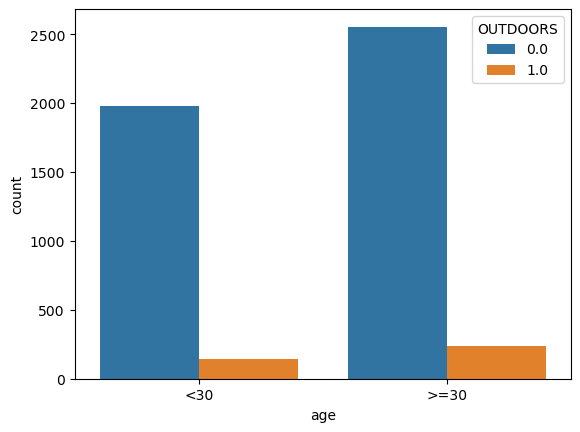

In [23]:
sns.countplot(x=df_daily["age"],hue=df_daily["OUTDOORS"]) 

<AxesSubplot:xlabel='gender', ylabel='count'>

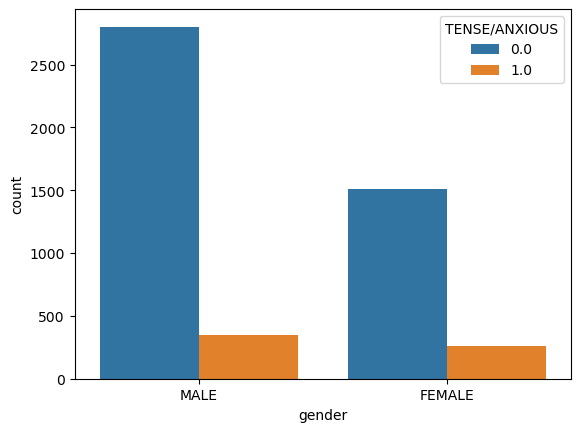

In [24]:
sns.countplot(x=df_daily["gender"],hue=df_daily["TENSE/ANXIOUS"]) 


<AxesSubplot:xlabel='age', ylabel='count'>

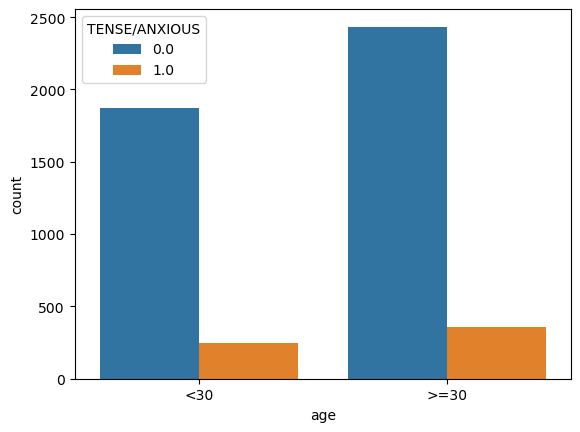

In [25]:
sns.countplot(x=df_daily["age"],hue=df_daily["TENSE/ANXIOUS"]) 


<AxesSubplot:xlabel='age', ylabel='count'>

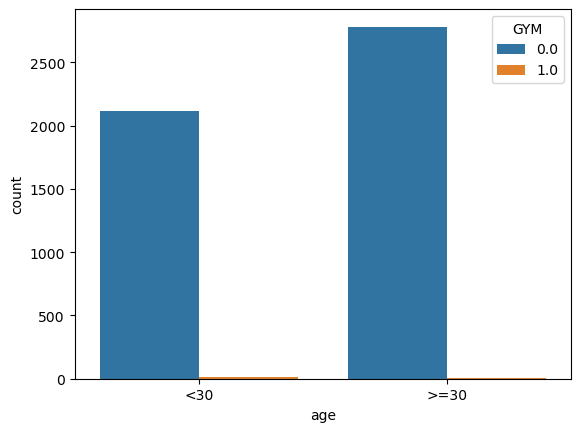

In [26]:
sns.countplot(x=df_daily["age"],hue=df_daily["GYM"]) 


<AxesSubplot:xlabel='gender', ylabel='count'>

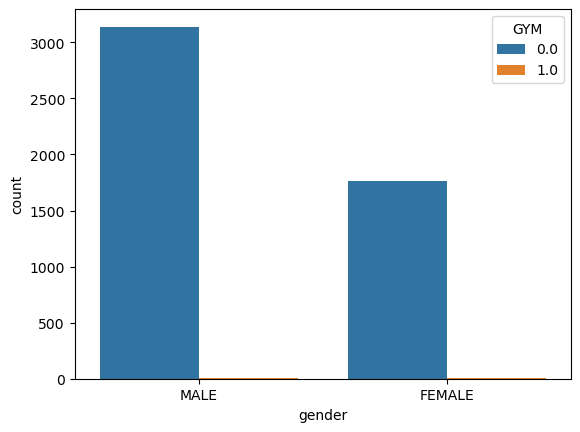

In [27]:
sns.countplot(x=df_daily["gender"],hue= df_daily["GYM"] ) 


<AxesSubplot:xlabel='gender', ylabel='count'>

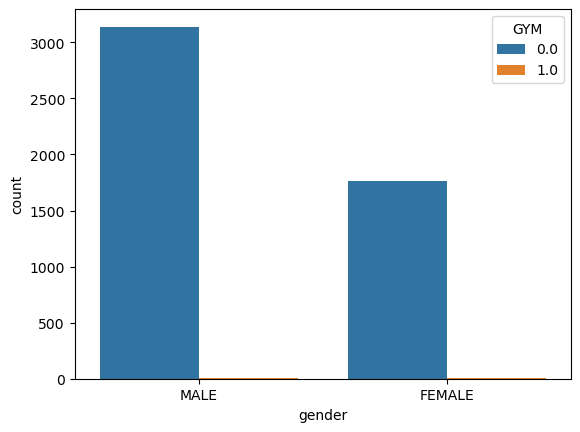

In [28]:
sns.countplot(x=df_daily["gender"],hue= df_daily["GYM"] ) 


## Multivariate

<AxesSubplot:xlabel='steps', ylabel='distance'>

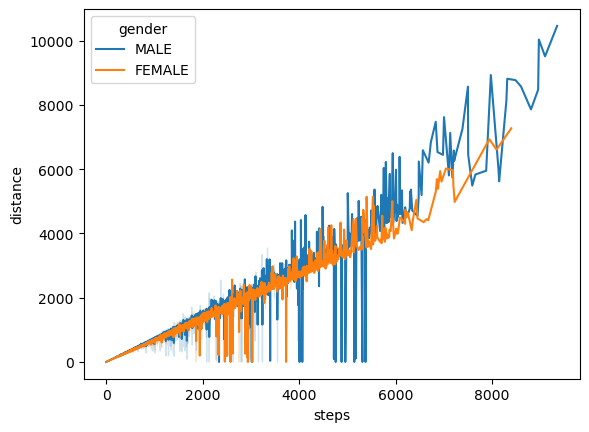

In [29]:
sns.lineplot(x=df_daily.steps ,y= df_daily.distance,hue=df_daily.gender)

<AxesSubplot:xlabel='hour', ylabel='calories'>

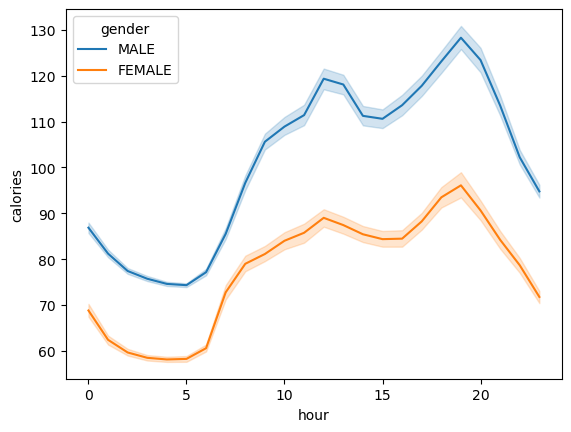

In [30]:
sns.lineplot(x=df_daily.hour,y=df_daily.calories,hue=df_daily.gender)

<AxesSubplot:xlabel='hour', ylabel='calories'>

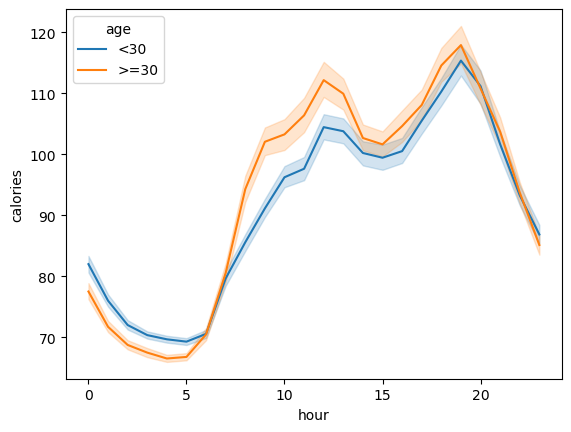

In [31]:
sns.lineplot(x=df_daily.hour,y=df_daily.calories,hue=df_daily.age)

In [32]:
cate_columns_daily=df_daily.select_dtypes(include=['category','object'])
numeric_columns_daily=df_daily.select_dtypes(include=['int','float']) 

In [33]:
df_daily.head()

,date,hour,temperature,badgeType,calories,distance,activityType,bpm,mindfulness_session,scl_avg,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,2021-05-24,0.0,-1.466659,NaN,89.04,98.3,NaN,66.874763,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-05-24,1.0,0.210289,NaN,65.62,0.0,NaN,58.711364,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-05-24,2.0,-1.359378,NaN,65.40,NaN,NaN,55.133495,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-05-24,3.0,-0.316295,NaN,69.01,11.0,NaN,60.488613,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-05-24,4.0,0.416455,NaN,65.73,0.0,NaN,59.110638,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


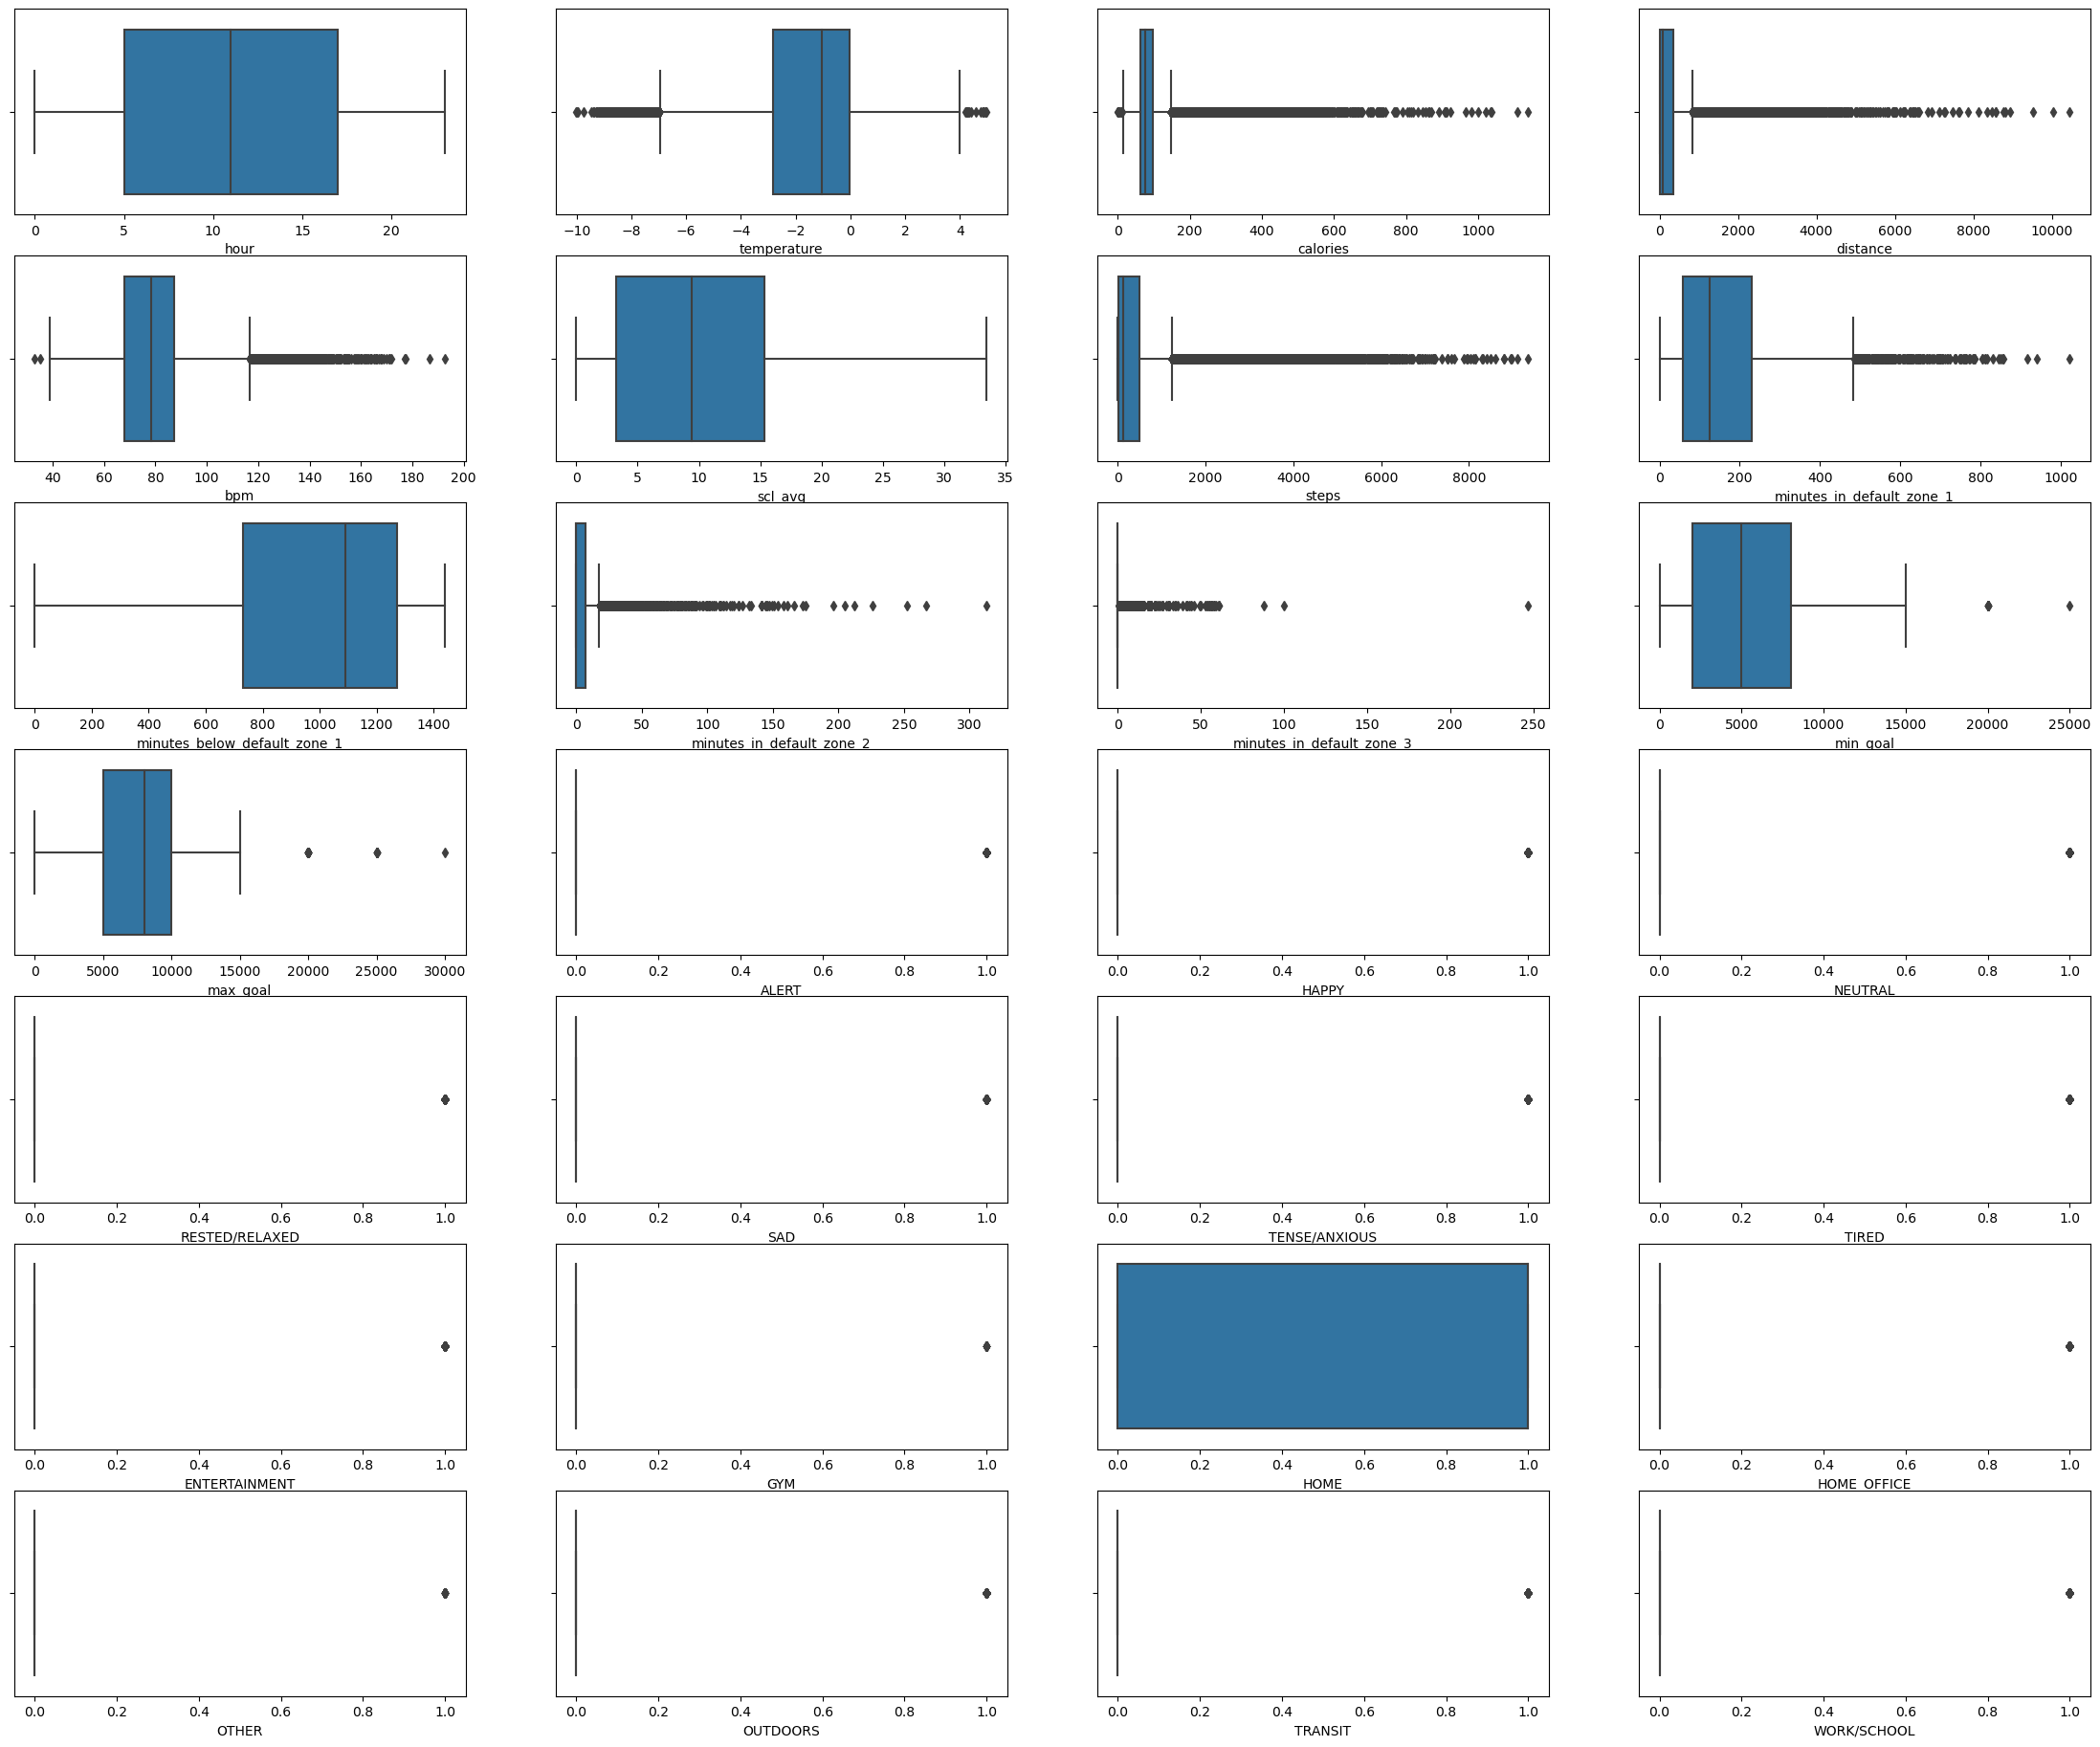

In [34]:
draw_boxplot( df_daily,numeric_columns_daily,df_daily["gender"])

<AxesSubplot:>

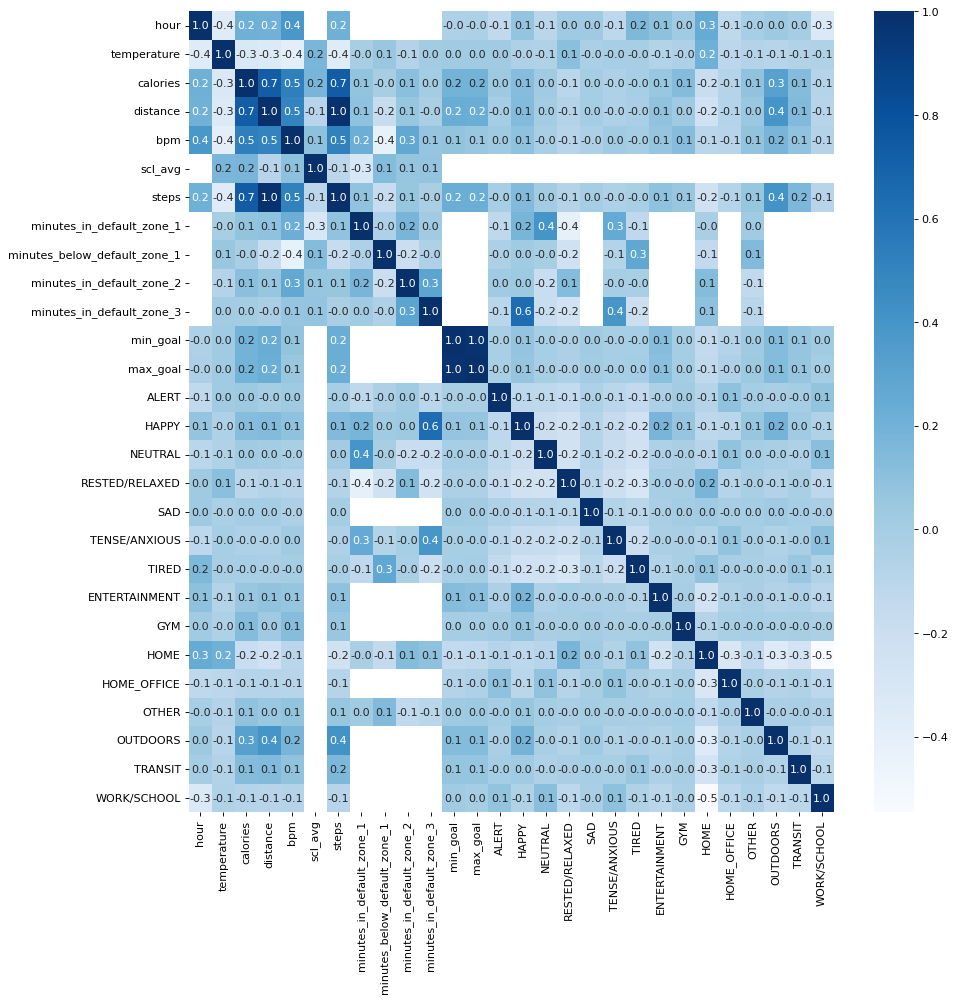

In [35]:
import seaborn as sb
corr = df_daily.corr()
plt.figure(figsize=(13, 13), dpi=80)
# plt.fig(figures)
sb.heatmap(corr, cmap="Blues", annot=True,fmt='.1f')

In [36]:
cate_columns_daily=df_daily.select_dtypes(include=['category','object'])
numeric_columns_daily=df_daily.select_dtypes(include=['int','float']) 

## Feature Selection

In [37]:
a=df_daily.isnull().sum()*100/df_daily.shape[0]

# select columns with less than 10 null values
selected_cols = a[a < 50].index.tolist() 

In [38]:
df_daily = df_daily[selected_cols] 

In [39]:
 
df_daily.drop("date",axis=1,inplace=True)

In [40]:
cate_columns_daily=df_daily.select_dtypes(include=['category','object'])
numeric_columns_daily=df_daily.select_dtypes(include=['int','float']) 
df_daily.head()

,hour,calories,distance,bpm,mindfulness_session,steps,age,gender,bmi
0,0.0,89.04,98.3,66.874763,False,134.0,<30,MALE,<19
1,1.0,65.62,0.0,58.711364,False,0.0,<30,MALE,<19
2,2.0,65.40,NaN,55.133495,False,NaN,<30,MALE,<19
3,3.0,69.01,11.0,60.488613,False,15.0,<30,MALE,<19
4,4.0,65.73,0.0,59.110638,False,0.0,<30,MALE,<19


<AxesSubplot:>

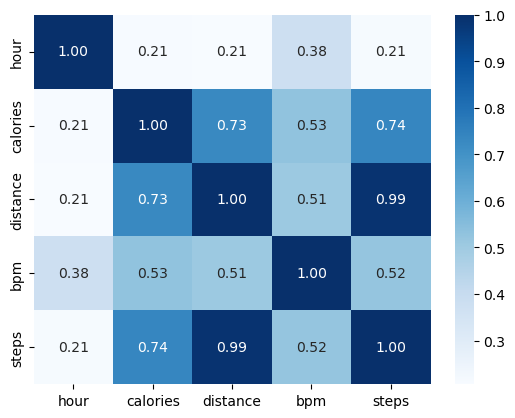

In [41]:

sns.heatmap(df_daily.corr(),annot=True,fmt='.2f',cmap="Blues")

In [42]:
df_daily.drop([ "hour"],axis=1,inplace=True)
# df_daily.head()

<AxesSubplot:>

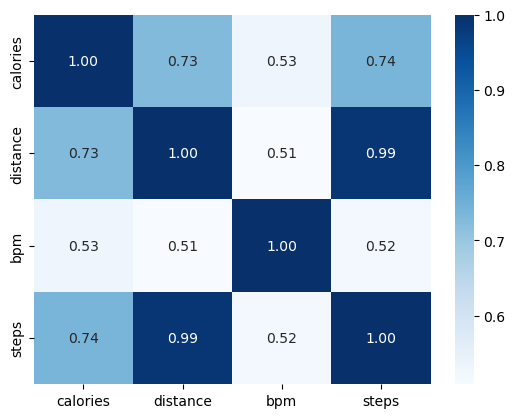

In [43]:

sns.heatmap(df_daily.corr(),annot=True,fmt='.2f',cmap="Blues")

## Feature Encode

In [44]:
df_daily.head()

,calories,distance,bpm,mindfulness_session,steps,age,gender,bmi
0,89.04,98.3,66.874763,False,134.0,<30,MALE,<19
1,65.62,0.0,58.711364,False,0.0,<30,MALE,<19
2,65.40,NaN,55.133495,False,NaN,<30,MALE,<19
3,69.01,11.0,60.488613,False,15.0,<30,MALE,<19
4,65.73,0.0,59.110638,False,0.0,<30,MALE,<19


In [45]:
df_daily.isnull().sum()*100/df_daily.shape[0]

calories                0.288387
distance               41.612333
bpm                    39.740327
mindfulness_session     0.248263
steps                  41.612333
age                     8.408356
gender                  4.751486
bmi                     8.408356
dtype: float64

## Outliers

In [46]:
cate_columns_daily=df_daily.select_dtypes(include=['category','object'])
numeric_columns_daily=df_daily.select_dtypes(include=['int','float']) 
df_daily.head()

,calories,distance,bpm,mindfulness_session,steps,age,gender,bmi
0,89.04,98.3,66.874763,False,134.0,<30,MALE,<19
1,65.62,0.0,58.711364,False,0.0,<30,MALE,<19
2,65.40,NaN,55.133495,False,NaN,<30,MALE,<19
3,69.01,11.0,60.488613,False,15.0,<30,MALE,<19
4,65.73,0.0,59.110638,False,0.0,<30,MALE,<19


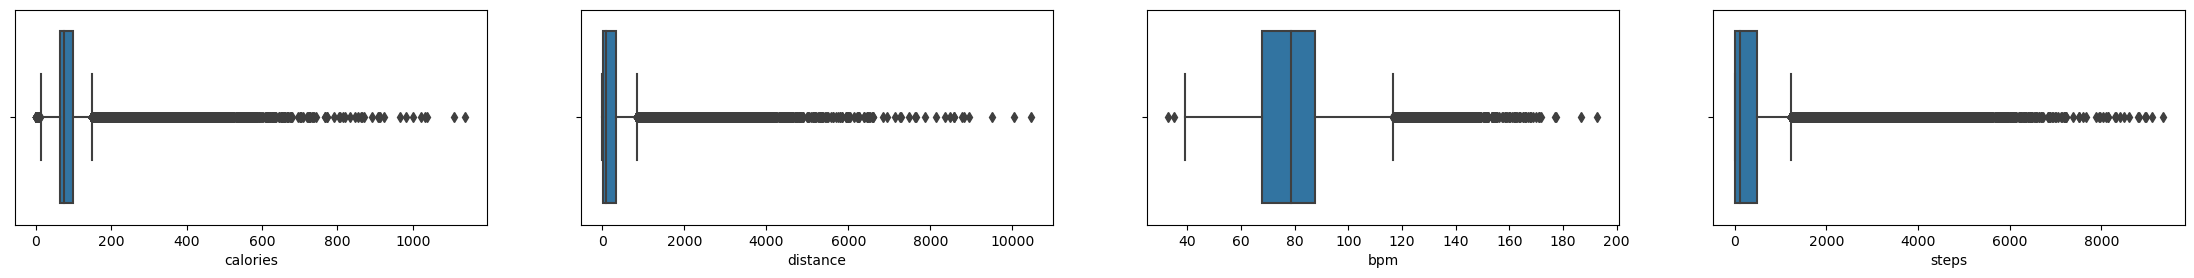

In [47]:

draw_boxplot(df_daily,numeric_columns_daily)

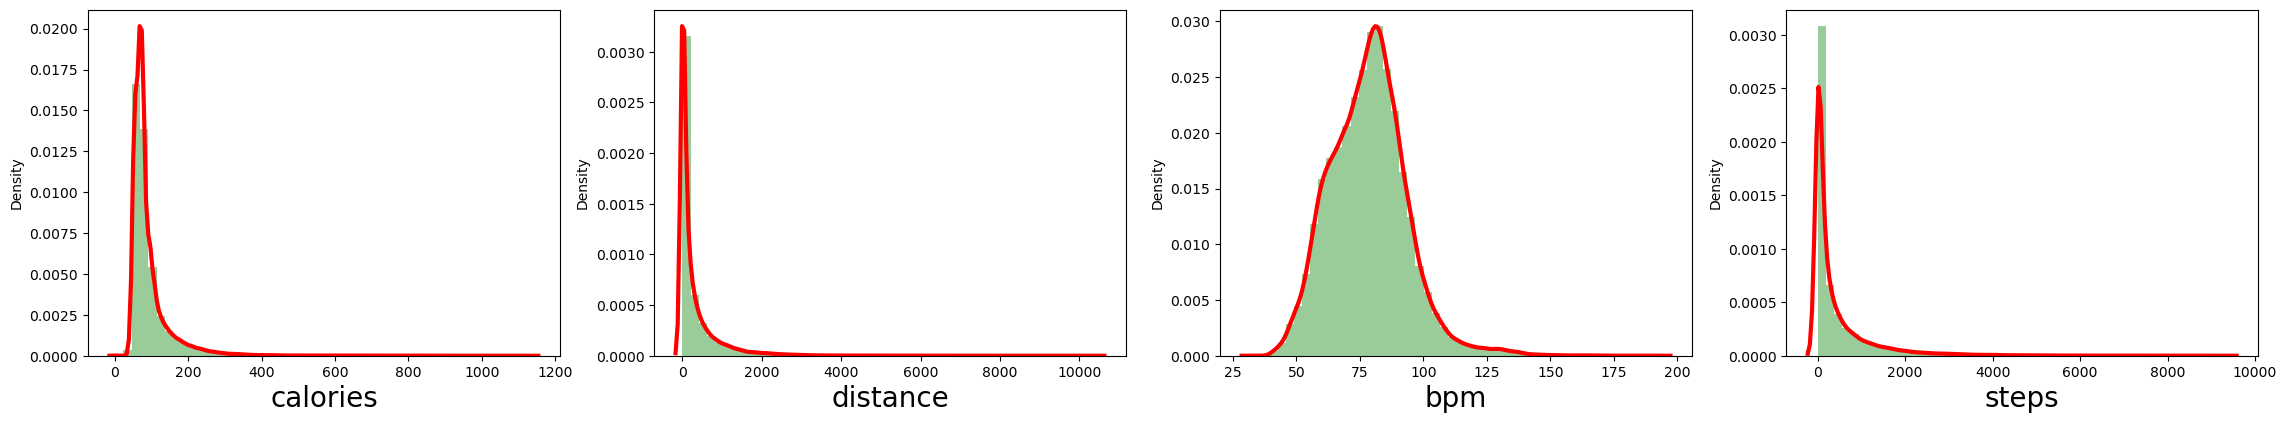

In [48]:
draw_dist(df_daily,numeric_columns_daily)

In [49]:
names=["calories","distance","steps"]
for name in names:
    percentile25 = df_daily[name].quantile(0.25)
    percentile75 = df_daily[name].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 3  * iqr
    lower_limit = percentile25 - 3 * iqr

    df_daily[name] = np.where(
    df_daily[name]>upper_limit,
    upper_limit,
    np.where(
        df_daily[name]<lower_limit,
        lower_limit,
        df_daily[name]
    )
) 
upper_limit = df_daily["bpm"].mean() + 3*df_daily["bpm"].std()
lower_limit = df_daily["bpm"].mean() - 3*df_daily["bpm"].std()
df_daily["bpm"] = np.where(
df_daily["bpm"]>upper_limit,
    upper_limit,
    np.where(
        df_daily["bpm"]<lower_limit,
        lower_limit,
        df_daily["bpm"]
    )
)
 
# replace_outliers_unform(df_daily,[])

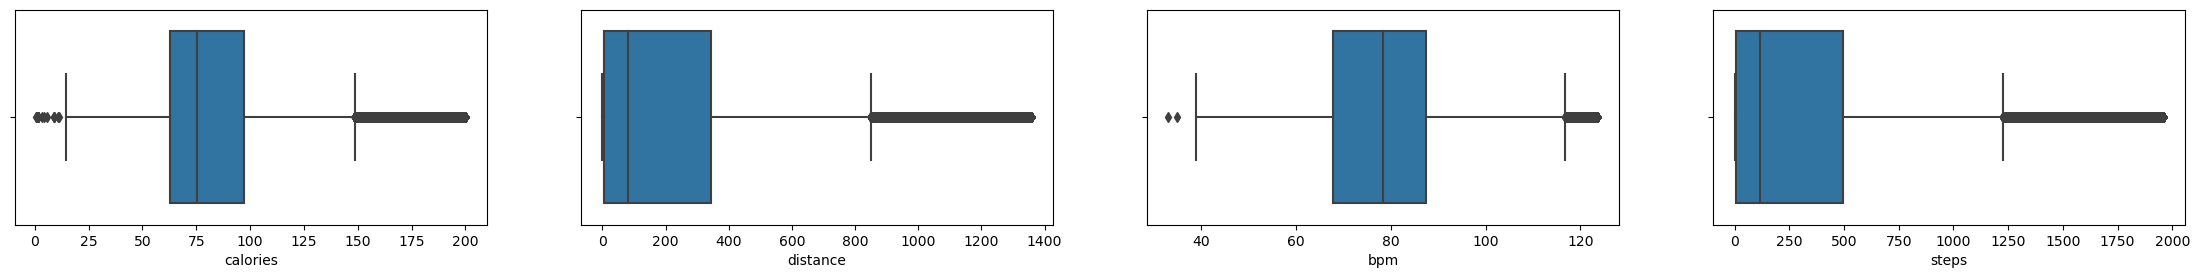

In [50]:
cate_columns_daily=df_daily.select_dtypes(include=['category','object'])
numeric_columns_daily=df_daily.select_dtypes(include=['int','float'])  
draw_boxplot(df_daily,numeric_columns_daily)

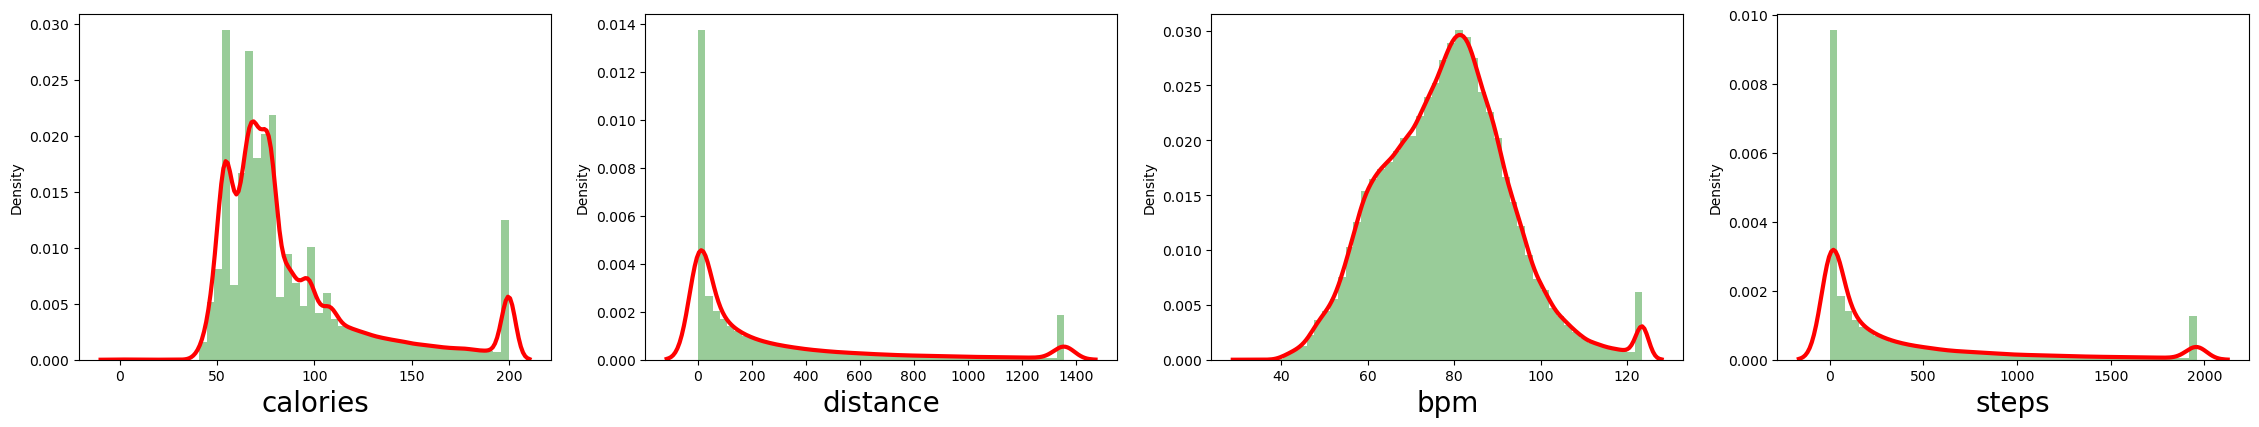

In [51]:
draw_dist(df_daily,numeric_columns_daily) 

## Deal Null Values

In [52]:
df_daily.isnull().sum() 

calories                 460
distance               66375
bpm                    63389
mindfulness_session      396
steps                  66375
age                    13412
gender                  7579
bmi                    13412
dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

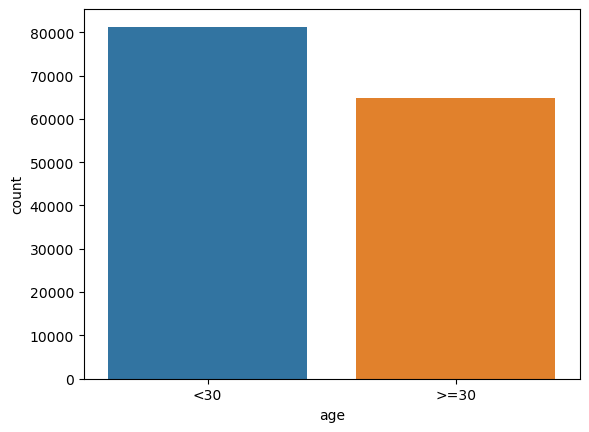

In [53]:
sns.countplot(x=df_daily.age)

<AxesSubplot:xlabel='gender', ylabel='count'>

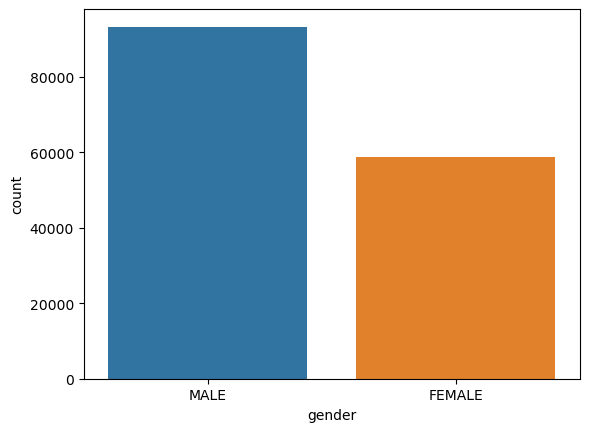

In [54]:
sns.countplot(x=df_daily.gender)

<AxesSubplot:xlabel='index', ylabel='bmi'>

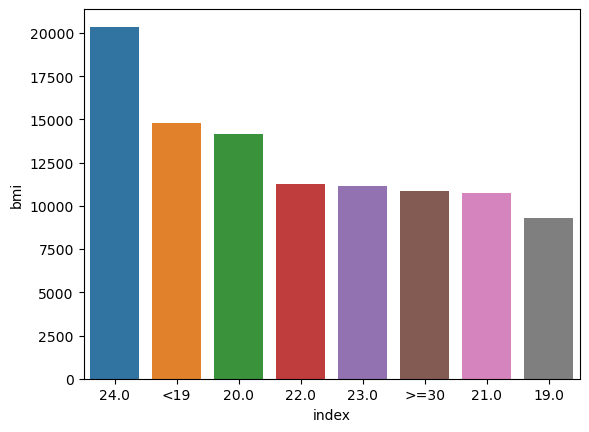

In [55]:
a=df_daily.bmi.value_counts().sort_values(ascending=False).head(8).reset_index()
sns.barplot(x=a["index"],y=a["bmi"]) 

In [56]:
import random
a=a["index"].tolist() 
df_daily['bmi'].fillna(value=random.choice(a), inplace=True)

## Encode

In [57]:
df_daily['bpm'].fillna(df_daily['bpm'].mean(), inplace=True)
df_daily['gender'].fillna(df_daily['gender'].mode()[0], inplace=True) 
df_daily['age'].fillna(df_daily['age'].mode()[0], inplace=True)  
df_daily.calories.fillna(df_daily.calories.mean(),inplace=True)
df_daily['mindfulness_session'].fillna(df_daily['mindfulness_session'].mode()[0], inplace=True)  
df_daily['distance'].fillna(df_daily['distance'].mean() , inplace=True)  
df_daily['steps'].fillna(df_daily['steps'].mean() , inplace=True)  

In [58]:
df_daily.head()

,calories,distance,bpm,mindfulness_session,steps,age,gender,bmi
0,89.04,98.300000,66.874763,False,134.000000,<30,MALE,<19
1,65.62,0.000000,58.711364,False,0.000000,<30,MALE,<19
2,65.40,259.745368,55.133495,False,372.432242,<30,MALE,<19
3,69.01,11.000000,60.488613,False,15.000000,<30,MALE,<19
4,65.73,0.000000,59.110638,False,0.000000,<30,MALE,<19


In [59]:
df_daily.isnull().sum() 

calories               0
distance               0
bpm                    0
mindfulness_session    0
steps                  0
age                    0
gender                 0
bmi                    0
dtype: int64

In [60]:
df_daily[[ "mindfulness_session", "age", "gender"]]=pd.get_dummies(df_daily[[ "mindfulness_session", "age", "gender"]],drop_first=True)
df_daily.drop("bmi",axis=1,inplace=True)## below  Random forest told us it is one of least important  column

## Standardize

In [61]:
scaler = StandardScaler()
df_daily[["calories","distance","bpm","steps"]] = scaler.fit_transform(df_daily[["calories","distance","bpm","steps"]])


In [62]:
df_daily.head()

,calories,distance,bpm,mindfulness_session,steps,age,gender
0,0.028831,-5.569175e-01,-1.000731,False,-0.573679,0,1
1,-0.574730,-8.960104e-01,-1.717675,False,-0.896089,0,1
2,-0.580399,1.960855e-16,-2.031899,False,0.000000,0,1
3,-0.487365,-8.580651e-01,-1.561590,False,-0.859999,0,1
4,-0.571895,-8.960104e-01,-1.682609,False,-0.896089,0,1


## Model Creation 

In [63]:
y=df_daily["calories"]
X=df_daily.drop("calories",axis=1)
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.33, random_state=42)

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor() 

In [65]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred_rf  ))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred_rf ))
print("R-squared:", r2_score(y_test,y_pred_rf ))


Mean Absolute Error: 0.30997535947801413
Mean Squared Error: 0.25478571214352036
R-squared: 0.7426684307165116


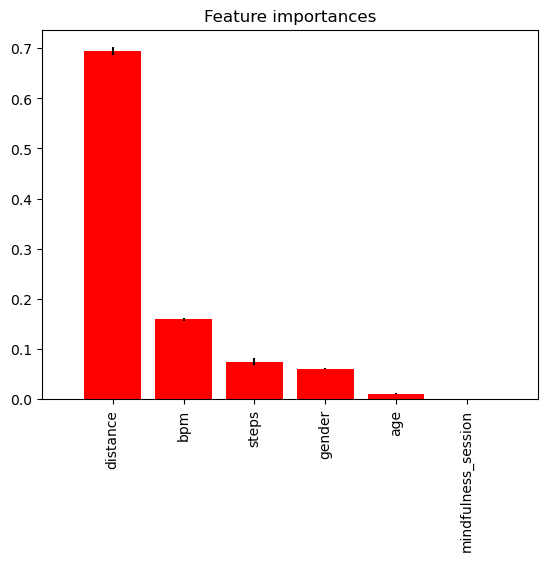

In [67]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],  color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.xticks(rotation=90)
plt.show()


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 500}


In [69]:
y_pred_rf = grid_search.predict(X_test)

In [70]:
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred_rf))
print("R2 score of Random Forest :", r2_score(y_test,y_pred_rf ))


Mean Absolute Error: 0.3018793723470239
Mean Squared Error: 0.23640677808942287
R2 score of Random Forest : 0.7612310098427483


### Xgboost

In [71]:
import xgboost as xgb 
xgb_model = xgb.XGBRegressor()


In [72]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [73]:
 
print("Mean Absolute Error of Xgboost :", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error of Xgboost :", mean_squared_error(y_test,y_pred))
print("R-squared of Xgboost :", r2_score(y_test,y_pred  ))


Mean Absolute Error of Xgboost : 0.30092605117665394
Mean Squared Error of Xgboost : 0.24017479945517975
R-squared of Xgboost : 0.7574253378410241


In [74]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Create an XGBoost Regressor object
xgb_reg = xgb.XGBRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 500]
}

# Create a RandomizedSearchCV object and fit it to the data
random_search = RandomizedSearchCV(xgb_reg, param_distributions=param_grid, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)


Best hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [75]:
y_pred_xb = random_search.predict(X_test)

In [76]:
 
print("Mean Absolute Error of Xgboost :", mean_absolute_error(y_test,y_pred_xb ))
print("Mean Squared Error of Xgboost :", mean_squared_error(y_test,y_pred_xb ))
print("R-squared of Xgboost :", r2_score(y_test,y_pred_xb ))


Mean Absolute Error of Xgboost : 0.2989651797653509
Mean Squared Error of Xgboost : 0.236604988384589
R-squared of Xgboost : 0.7610308190005141
